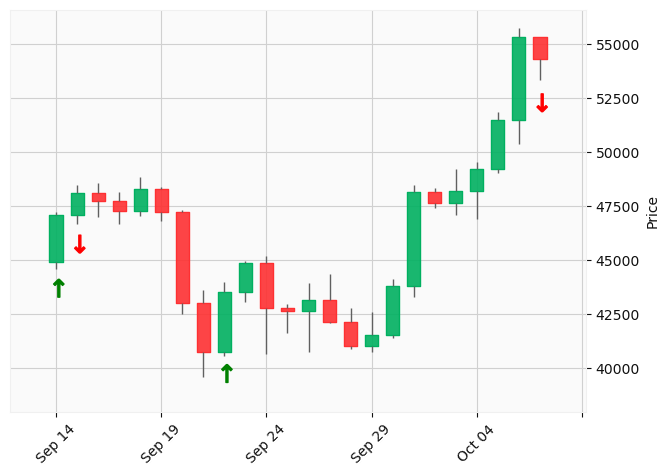

In [61]:
import numpy as np
import mplfinance as mpf
import pandas as pd
import requests

# url - price action plot url - /plot-candlestick-data
# body - symbol / interval / take last N
resp = requests.post(
    url='http://localhost:1010/plot-candlestick-data',
    json={'symbol': 'BTCUSDT', 'interval': 'ONE_DAY', 'limit': '24'}
)
df = pd.read_json(resp.text)
df.index = pd.DatetimeIndex(df['Date'])

# temp file name - symbol / interval / take last N.csv
df.to_csv('BTCUSDT_ONE_DAY_50.cvs')
daily = pd.read_csv('/Users/alex.gaas/Desktop/projects/jupiter/BTCUSDT_ONE_DAY_50.cvs', index_col=0, parse_dates=True)

markers = ['$\\uparrow$','$\\downarrow$',None,None,None,None,None,None,'$\\uparrow$',None,
           None,None,None,None,None,None,None,None,None,None,None,None,None,'$\\downarrow$']
color=['g','r']*12
color=color[0:24]

ap = mpf.make_addplot(0.98*df['Low'],type='scatter',marker=markers,markersize=165,color=color)
mpf.plot(daily, type='candle', style='yahoo', volume=False, addplot=ap)